In [1]:
# Required to load webpages
from IPython.display import IFrame

[Table of contents](../toc.ipynb)


# Scikit-learn

<a href="https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/"><img src="https://covers.oreillystatic.com/images/0636920085423/lrg.jpg" alt="Scikit-learn book" width="100" align="right"></a>
<a href="http://shop.oreilly.com/product/0636920085423.do"><img src="https://covers.oreillystatic.com/images/0636920030515/cat.gif" alt="Scikit-learn book2" width="100" align="right"></a>
<img src="https://github.com/scikit-learn/scikit-learn/raw/master/doc/logos/scikit-learn-logo-small.png" alt="Scikit-learn" width="200" align="right">

Scikit-learn is mature machine learning library for Python and one of the most recognized open source projects on github. Please find here a gitbhub blog which lists state of the art machine learning programming languages and libraries [https://github.blog/2019-01-24-the-state-of-the-octoverse-machine-learning/](https://github.blog/2019-01-24-the-state-of-the-octoverse-machine-learning/)
* Scikit-learn started as google summer of code project in 2007 and provides many machine learning algorithms for 
  * Classification,
  * Regression,
  * Clustering,
  * Dimensionality reduction,
  * Model selection,
  * and data preprocessing.
* Scikit-learn is very well documented [https://scikit-learn.org/stable/index.html](https://scikit-learn.org/stable/index.html) and even some books are written about this package [[Guido2016]](./references.bib), [[Albon2018]](./references.bib).

In [2]:
IFrame(src='https://scikit-learn.org/stable/index.html', width=1000, height=600)

# General API of scikit-learn

Although there are dozens of machine learning algorithms implemented in scikit-learn, all share a common interface. In general, you import some machine learning algorithm from a scikit-learn package, fit, and predict the data.

For example we can use the linear regression estimator with these few code lines.

In [3]:
from sklearn import linear_model

model = linear_model.LinearRegression()
X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Hence, almost all algorithms are initialized with `model = sklearn.SomeAlgorithm()`, and the data learning starts with the `SomeAlgorithm.fit()` method. In supervised learning, the `fit()` method requires data and targets, or labels, in unsupervised learning, just the data.

After the `fit()` call, we can use the trained algorithm to make predictions on unknown data, which is the main purpose of any machine learning algorithm.

In [4]:
model.predict([[3, 3]])

array([3.])

# Some general machine learning tips

As said this small section of this course can not teach machine learning and you are more than welcome to consult one of the mentioned books in the introduction. Anyway, there are some basic concepts in machine learning you should have heard.

Always [reserve some data for testing](https://scikit-learn.org/stable/modules/cross_validation.html) your algorithm. There are many algorithms which suffer from overfitting. Hence, test the trained algorithm on some unseen data. In practice you can use cross validation to determine the performance of your algorithm.

Consider [feature reduction](https://scikit-learn.org/stable/modules/feature_selection.html), [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling), and other data clearance tasks before machine learning. It is often more successful to scale and clean the data before you move to more advanced machine learning algorithms.

Feature scaling is vital for many machine learning algorithms, because they expect feature with zero mean and unit variance entering their cost function. If you miss feature scaling, your algorithm might be dominated by features with largest variance and the algorithm might ignore features on small variance.

Additionally, use either **bootstrapping** or machine learning algorithms which predict the target and its uncertainty.

# Choosing the right estimator

It is not the goal of this class to teach machine learning because this would require an extensive course on its own to teach it on a reasonable level. However, if you have never heard about machine learning, a general overview would be helpful to find the right algorithm for your task.

Luckily, scikit-learn provides a great overview and decision picture to explore and find the right algorithm for your problem.

In [5]:
IFrame(src='https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html', width=1000, height=600)

# Some popular algorithms

In the following, we will have a snapshot on regression and classification, which are probably most applied in engineering tasks. As said in scikit-learns machine learning map, a classifier predicts if some input belongs to a category, and a regression algorithm predicts a quantity.

For example:

**Classification** predicts if a picture is a cat or a dog.

**Regression** predicts a temperature given a pressure and material properties.

The `linear_model.LinearRegression()` from above is a regression algorithm.

## Toy data

To apply these algorithms directly, we will first import two toy data sets from scikit-learn. These data sets are part of the package.

In [6]:
from sklearn import datasets

# load a regression data set of Boston house prices
boston = datasets.load_boston()

# load a classification data set of hand written digits
digits = datasets.load_digits()

### Explore the boston toy data set

The boston toy data set is a regression data set where the input is a matrix of 506 samples on 13 dimensions. The target is a column vector of the median of the house price in 1000 USD.

The full description of this data set can be returned by:

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
print("Shape of the features X is:", boston.data.shape)
print("Shape of the targets is:", boston.target.shape)

Shape of the features X is: (506, 13)
Shape of the targets is: (506,)


### Explore the digits toy data set

The digits toy data set is a classification data set of 1797 hand written digits between zero and nine. Each data point is a 8x8 gray scale image. Hence, we can view some of the digits directly.

In [9]:
print(digits.data.shape)

(1797, 64)


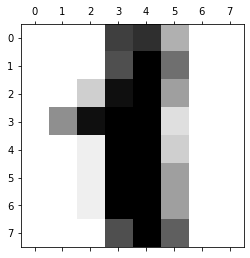

In [10]:
import matplotlib.pyplot as plt 
 
plt.matshow(digits.images[1], cmap=plt.cm.gray_r) 
plt.show()

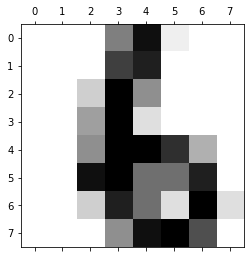

The target category for this image is: 6
All possible targets are: [0 1 2 3 4 5 6 7 8 9]


In [11]:
plt.matshow(digits.images[16], cmap=plt.cm.gray_r) 
plt.show()

print("The target category for this image is:", digits.target[16])
print("All possible targets are:", digits.target_names)

The colors of the hand written digits are actually encoded as "z" values of a two dimensional matrix, as you can see here:

In [12]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Prepare the toy data for machine learning

It is crucial to split the data into train set and test set to evaluate the performance of the machine learning algorithms on unseen data. Add to this, some quality metrics would be nice. Moreover, feature scaling was mentioned as required data pre-processing step for many machine learning algorithms.

Scikit-learn offers here helpful modules and functions like `sklearn.model_selection`, `sklearn.metrics`, and `sklearn.preprocessing`.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#### Prepare Boston data

First, we start to prepare the regression data set of the Boston house prices. The next code block splits the data into train and test set, where the test set contains 30% of the data. Add to this, the data is shuffled.

In [14]:
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston.data, boston.target, 
                                                                                test_size=0.3, shuffle=True)

In [15]:
print(boston_X_train.shape)
print(boston.data.shape)

(354, 13)
(506, 13)


Now we will scale the data.

In [16]:
boston_scaler = StandardScaler().fit(boston_X_train)

In [17]:
print("Learned mean:", boston_scaler.mean_)
print("Learned scale:", boston_scaler.scale_)

Learned mean: [3.19608718e+00 1.18940678e+01 1.11408757e+01 7.06214689e-02
 5.52547175e-01 6.27254237e+00 6.80313559e+01 3.75806130e+00
 9.01129944e+00 4.00788136e+02 1.83477401e+01 3.58436949e+02
 1.24731356e+01]
Learned scale: [7.21627539e+00 2.38891495e+01 6.93930247e+00 2.56191485e-01
 1.17634420e-01 7.03617364e-01 2.86483285e+01 2.07256031e+00
 8.47661369e+00 1.65328359e+02 2.23510967e+00 8.79386884e+01
 7.08693088e+00]


#### Prepare digits

Here, we just need to apply `train_test_split` and some reshape of the features. Remember that the features are a 8x8 square matrix here. We need to flatten the features first.

In [18]:
digits_X = n_samples = digits.images.reshape((len(digits.images), -1))

In [19]:
print("New shape of flat digits images:", digits_X.shape)

New shape of flat digits images: (1797, 64)


In [20]:
digits_X_train, digits_X_test, digits_y_train, digits_y_test = train_test_split(digits_X, digits.target, 
                                                                                test_size=0.3, shuffle=True)

## SVM for classification

<a title="Ennepetaler86 [CC BY (https://creativecommons.org/licenses/by/3.0)]" href="https://commons.wikimedia.org/wiki/File:Svm_intro.svg"><img width="150" alt="Svm intro" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Svm_intro.svg/128px-Svm_intro.svg.png" align="right"></a>

[Support vector machines](https://en.wikipedia.org/wiki/Support-vector_machine) (SVM)s are very popular supervised learners for classification, regression, and outliers detection. SVMs try to categorize data in sets with maximal gap, see figure on right. Split A has larger gap than B, therefore A is selected as dividing plane. Add to linear classification, SVMs can divide non-linear data thanks to the [kernel trick](https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick), where linear non-separable data is transformed in high dimensional feature space.

We can not go much deeper in the theory behind in this short introduction but we will use SVMs in practice. Please find more background in [SVM user guide of Scikit-learn](https://scikit-learn.org/stable/modules/svm.html). 

We will use a support vector machine for classification of the digits toy data set. The SVM is trained, its accuracy is reported in therms of precision, recall, support, and a confusion matrix. And finally, some images from the test set are compared with the prediction of the SVM.

In [21]:
from sklearn import svm

clf = svm.SVC()
# train the SVM
clf.fit(digits_X_train, digits_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
print("Classification accuracy report\n",
    metrics.classification_report(digits_y_test, clf.predict(digits_X_test))
)

Classification accuracy report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.93      1.00      0.96        51
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        61
           5       0.98      1.00      0.99        62
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        49
           8       1.00      0.91      0.95        46
           9       1.00      0.98      0.99        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



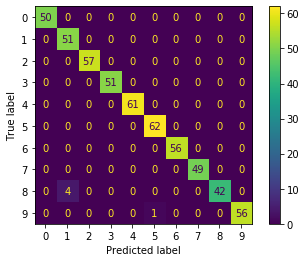

In [23]:
# present SVM's accuracy in a confusion matrix
metrics.plot_confusion_matrix(clf, digits_X_test, digits_y_test)
plt.show()

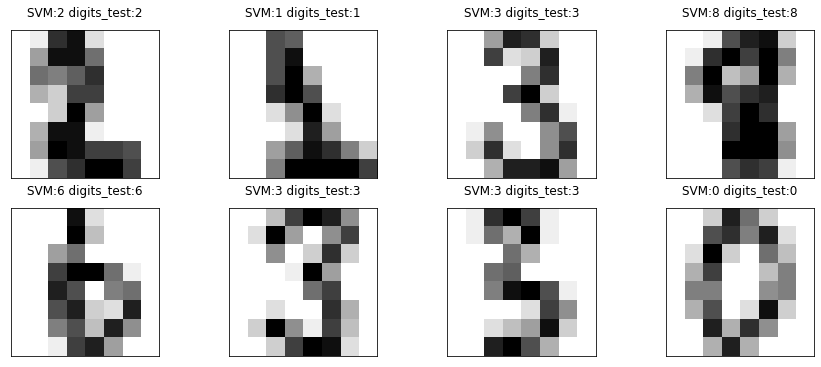

In [24]:
import numpy as np

fig, axs = plt.subplots(2,4, figsize=(15, 6))
axs = axs.ravel()

for i in range(8):
    axs[i].matshow(digits_X_test[i].reshape(8, 8), cmap=plt.cm.gray_r)
    axs[i].set_title("SVM:" + str(clf.predict(digits_X_test)[i]) + 
                     " digits_test:" + str(digits_y_test[i]))
    axs[i].set_xticks([]); axs[i].set_yticks([])

## SVM for regression

We can also use SVMs in regression tasks. Regression is also done with `fit()` method and we will present the accuracy as mean squared error between predicted data of the SVM and test data of the Boston data set.

In [25]:
reg = svm.SVR()

reg.fit(boston_scaler.transform(boston_X_train), boston_y_train)

predictions = reg.predict(boston_scaler.transform(boston_X_test))
metrics.mean_squared_error(boston_y_test, predictions)

22.662549331559333

A simple scatter plot on equal x and y axis range is often used to present the accuracy of a regression model. The ideal model would produce markers on a diagonal line with some elliptic shape due to noise.

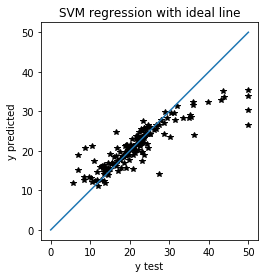

In [26]:
plt.figure()
plt.plot(boston_y_test, predictions, 'k*')
plt.plot([0, 50],[0, 50])
plt.xlim([0, 50]); plt.ylim([0, 50])
plt.xlabel("y test")
plt.ylabel("y predicted")
plt.axis('square')
plt.title('SVM regression with ideal line')
plt.show()

### Short sum up

These two short SVM examples in classification and regression should show how simple it is to use Scikit-learn for machine learning. However, **we skipped entirely the theory of machine learning which is absolutely vital** to select the right algorithm and to evaluate its results.

Therefore, it is highly recommended to consult the [SVM user guide of Scikit-learn](https://scikit-learn.org/stable/modules/svm.html) for further details on SVMs.

## Decision tree

Decision trees are another family of basic and popular machine learning algorithms for classification and regression. They present the data with simple if-then-else rules and are easy to visualize and to understand. They do not require much data preparation but can suffer from overfitting.

Imagine a data set of one feature, which is the age of persons, and the target, which is a vector of labels of two categories driver and non_driver (cars). The age ranges from zero to 90 years. A trained decision tree might look like

```
if age > 18:
    driver
else:
    non_driver
```

This is not very exciting because we know the relation ship between age and drivers license behind. However, note that decision trees generate such if-then-else rules purely form data! Hence, they can be used to uncover hidden rules in data and are very popular because of that.

But how does the decision tree find these rules? Another set of rules for this problem might have more trees for instance

```
if age == 17:
    driver
elif age > 18:
    driver
else:
    non_driver
```

This decision tree catches one driver which is 17 and made her license probably elsewhere. It is a rare event. However, the more branches the tree the higher precision but the poorer the generalization. Trees with too many branches suffer from overfitting. So how is the split into trees done?

### Tree construction

One basic algorithm to construct the tree in an optimal way is the [ID3 algorithm](https://en.wikipedia.org/wiki/ID3_algorithm) which build on entropy and information gain. Entropy is the amount of uncertainty in a data set and the tree tries to minimize the entropy in each node (uniform data in each node) and therefore maximizes the information gain in each node.

The information gain is defined by

$IG(S, A) = H(S) - \sum p(t)H(t) = H(S) - H(S|A)$,

where $H(S)$ is the entropy of the data set, $T$ are the subsets from splitting $S$, $p(t)$ is the fraction of elements in $t$ to elements in $S$, and $H(t)$ is the entropy of subset $t$.

So basically decision tree algorithms measure the information after a split and construct the tree so that the information gain is maximized.

Please find much more information in [Decision tree user guide of Scikit-learn](https://scikit-learn.org/stable/modules/tree.html) we skipped here many important concepts such as ensemble trees ([Random Forest](https://en.wikipedia.org/wiki/Random_forest), [Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting)) to treat bias variance dilemma of decision trees.

## Decision tree for classification

Let us train now a decision tree for the classification data set.

In [27]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(digits_X_train, digits_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
print("Classification accuracy report\n",
    metrics.classification_report(digits_y_test, clf.predict(digits_X_test))
)

Classification accuracy report
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        50
           1       0.69      0.90      0.78        51
           2       0.92      0.84      0.88        57
           3       0.81      0.84      0.83        51
           4       0.86      0.82      0.84        61
           5       0.82      0.76      0.79        62
           6       0.86      0.88      0.87        56
           7       0.81      0.88      0.84        49
           8       0.75      0.72      0.73        46
           9       0.89      0.82      0.85        57

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.84      0.84       540



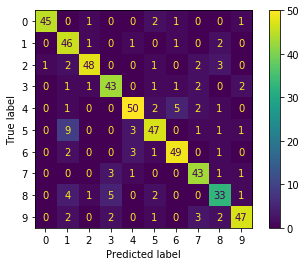

In [29]:
# present decision tree's accuracy in a confusion matrix
metrics.plot_confusion_matrix(clf, digits_X_test, digits_y_test)
plt.show()

## Decision tree for regression

Very similar to SVM regression code, we can compute the regression with a decision tree in a few lines of code.

In [30]:
reg = tree.DecisionTreeRegressor()

reg.fit(boston_scaler.transform(boston_X_train), boston_y_train)

predictions = reg.predict(boston_scaler.transform(boston_X_test))
metrics.mean_squared_error(boston_y_test, predictions)

32.78236842105263

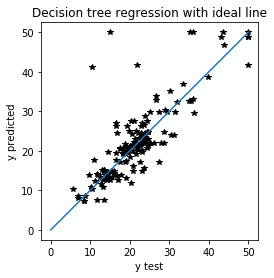

In [31]:
plt.figure()
plt.plot(boston_y_test, predictions, 'k*')
plt.plot([0, 50],[0, 50])
plt.xlim([0, 50]); plt.ylim([0, 50])
plt.xlabel("y test")
plt.ylabel("y predicted")
plt.axis('square')
plt.title('Decision tree regression with ideal line')
plt.show()

Herein, the decision tree performed worse than the SVM.

# Exercise:  Scikit-learn (20 minutes)

<img src="../_static/exercise.png" alt="Exercise" width="75" align="left">

<a title="Dake, Mysid [CC BY (https://creativecommons.org/licenses/by/1.0)]" href="https://commons.wikimedia.org/wiki/File:Neural_network.svg"><img width="250" alt="Neural network" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Neural_network.svg/512px-Neural_network.svg.png" align="right"></a>

* Please use a multilayer perceptron neural network [form Scikit-learn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) to compute a neural network classifier for the digits data set.
* The neural network should have one hidden layers with 5 neurons.
* How does the confusion matrix look like?
* What is the overall accuracy?

*Neural network image from: Dake, Mysid - Vectorized by Mysid in CorelDraw on an image by Dake., CC BY 1.0, https://commons.wikimedia.org/w/index.php?curid=1412126*

## Solution

Please find one possible solution in [`solution_sklearn.py`](solution_sklearn.py) file.

/home/rhs2rng/PycharmProjects/py-algorithms-4-automotive-engineering/_venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Classification accuracy report
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.90      0.82      0.86        57
           2       0.95      0.93      0.94        59
           3       0.88      0.91      0.89        55
           4       0.85      0.59      0.70        49
           5       0.84      0.94      0.89        51
           6       0.95      0.93      0.94        57
           7       0.71      1.00      0.83        49
           8       0.82      0.82      0.82        60
           9       0.85      0.80      0.83        51

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.86       540
weighted avg       0.88      0.87      0.87       540



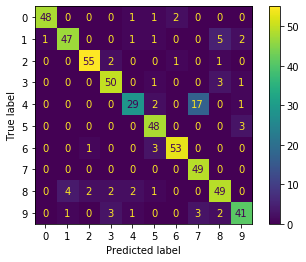

In [32]:
%run solution_sklearn.py